In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [3]:
data_file = '/Users/sudarshan/darshanz/datasets/lung1/NSCLC-Radiomics-Lung1.clinical-version3-Oct-2019.csv'

In [4]:
data_df = pd.read_csv(data_file)

In [5]:
data_df.head()

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event
0,LUNG1-001,78.7515,2.0,3,0,IIIb,large cell,male,2165,1
1,LUNG1-002,83.8001,2.0,0,0,I,squamous cell carcinoma,male,155,1
2,LUNG1-003,68.1807,2.0,3,0,IIIb,large cell,male,256,1
3,LUNG1-004,70.8802,2.0,1,0,II,squamous cell carcinoma,male,141,1
4,LUNG1-005,80.4819,4.0,2,0,IIIb,squamous cell carcinoma,male,353,1


In [6]:
data_df['Histology'].value_counts()

Histology
squamous cell carcinoma    152
large cell                 114
nos                         63
adenocarcinoma              51
Name: count, dtype: int64

In [7]:
censoring_count  = data_df['deadstatus.event'].value_counts()

In [8]:
censoring_count

deadstatus.event
1    373
0     49
Name: count, dtype: int64

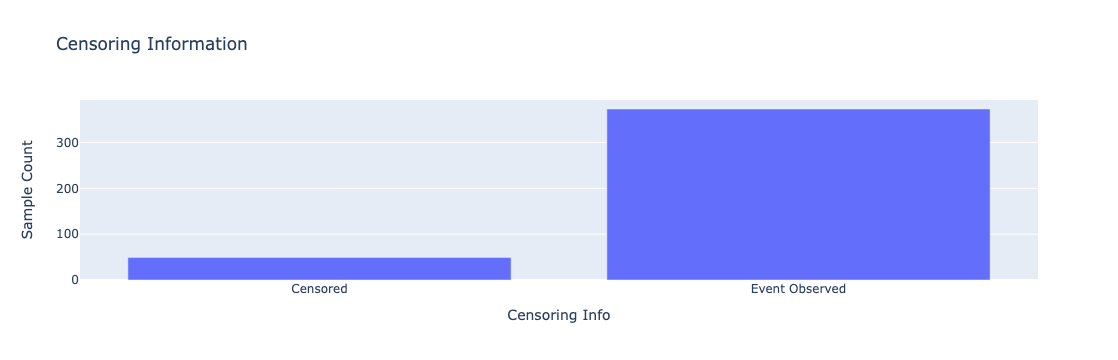

In [11]:
# Sample data
data = {'Censoring Info': ['Censored', 'Event Observed'],
        'Sample Count': [censoring_count[0], censoring_count[1]]}
# Create a bar chart using Plotly Express
fig = px.bar(data, x='Censoring Info', y='Sample Count', title='Censoring Information')
# Show the plot
fig.show()

<Axes: >

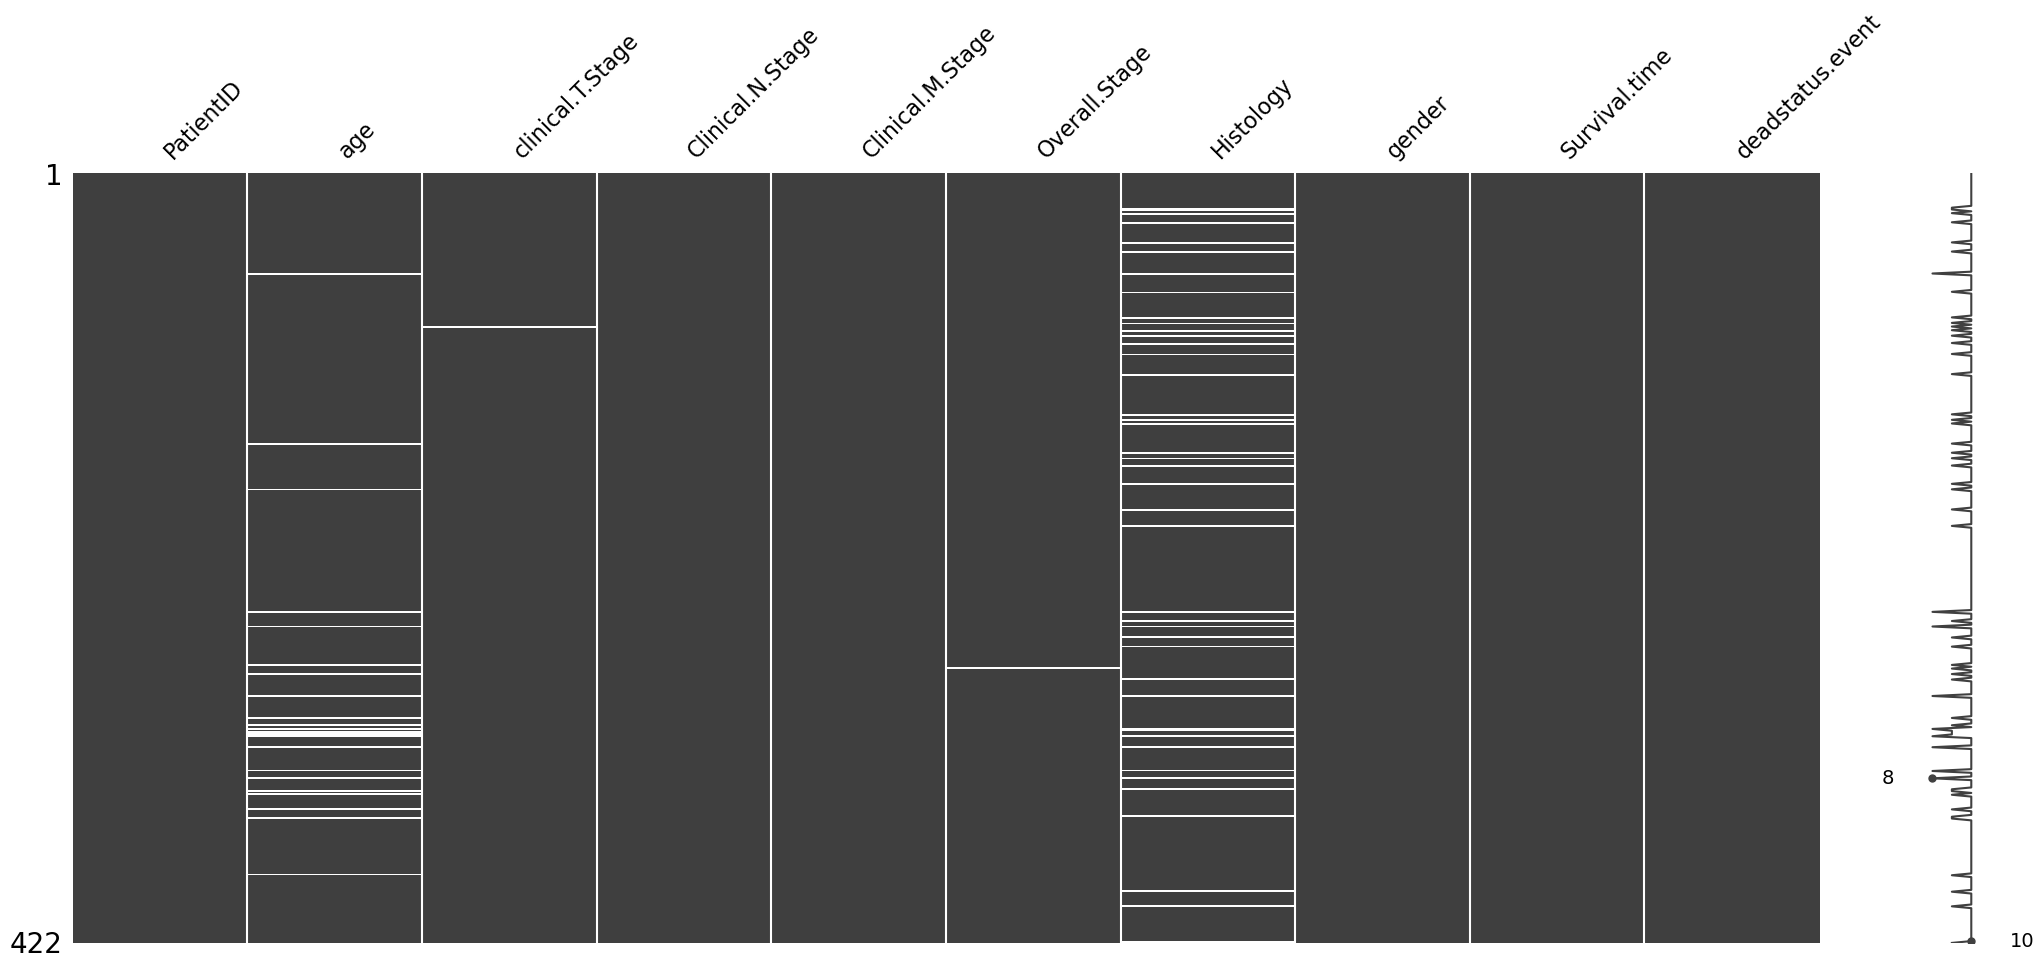

In [24]:
msno.matrix(data_df)

In [13]:
data_df.shape

(422, 10)

In [20]:
labeldf = data_df[['PatientID','Survival.time','deadstatus.event']]
new_column_labels = {'PatientID':'patient_id','Survival.time':'survival_time','deadstatus.event':'event_status'}
labeldf = labeldf.rename(columns=new_column_labels)
labeldf.to_csv("/Users/sudarshan/darshanz/datasets/lung1/label.csv")

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(labeldf['patient_id'], labeldf['event_status'],
                                                    stratify=labeldf['event_status'], 
                                                    test_size=0.20)

In [32]:
y_train.value_counts()

event_status
1    298
0     39
Name: count, dtype: int64

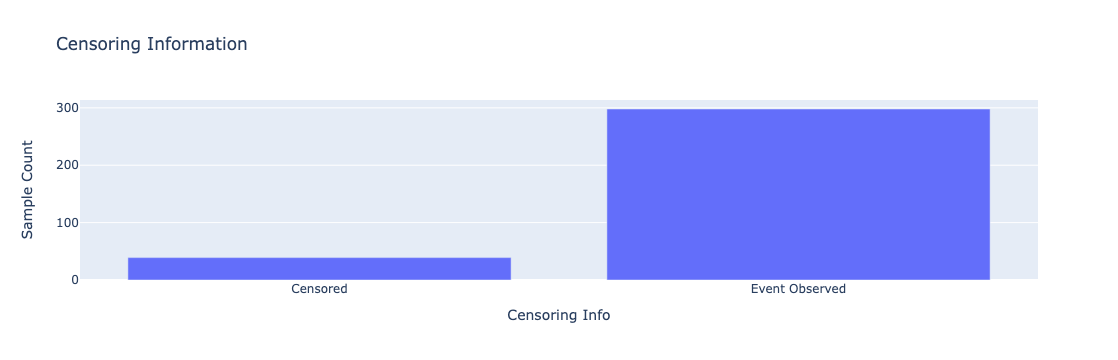

In [33]:
train_censoring_count  = y_train.value_counts()
# Sample data
data = {'Censoring Info': ['Censored', 'Event Observed'],
        'Sample Count': [train_censoring_count[0], train_censoring_count[1]]}
# Create a bar chart using Plotly Express
fig = px.bar(data, x='Censoring Info', y='Sample Count', title='Censoring Information')
# Show the plot
fig.show()

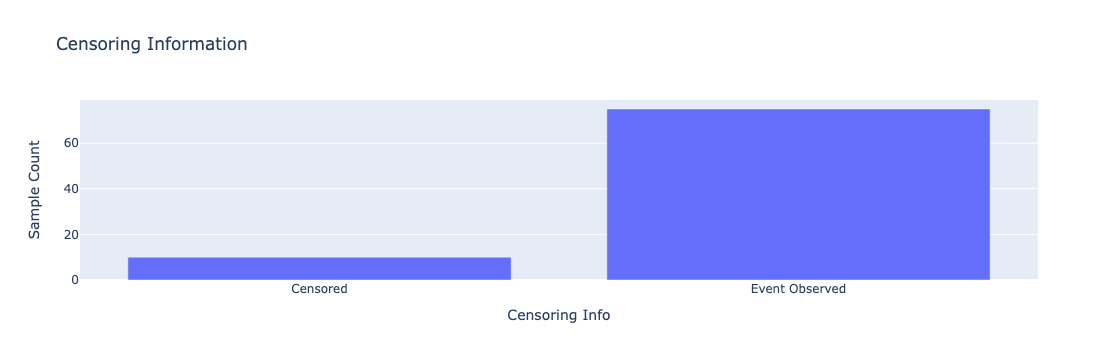

In [34]:
test_censoring_count  = y_test.value_counts()
# Sample data
data = {'Censoring Info': ['Censored', 'Event Observed'],
        'Sample Count': [test_censoring_count[0], test_censoring_count[1]]}
# Create a bar chart using Plotly Express
fig = px.bar(data, x='Censoring Info', y='Sample Count', title='Censoring Information')
# Show the plot
fig.show()

# Stratified k-fold

In [43]:
from sklearn.model_selection import StratifiedKFold

In [44]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(labeldf['patient_id'], labeldf['event_status'])

5

In [50]:
labeldf['fold'] = [0 for i in range(len(labeldf['patient_id'].values))] # just filled the fold with zeros temporarily

In [51]:
labeldf

,patient_id,survival_time,event_status,fold
0,LUNG1-001,2165,1,0
1,LUNG1-002,155,1,0
2,LUNG1-003,256,1,0
3,LUNG1-004,141,1,0
4,LUNG1-005,353,1,0
...,...,...,...,...
417,LUNG1-418,346,1,0
418,LUNG1-419,2772,0,0
419,LUNG1-420,2429,1,0
420,LUNG1-421,369,1,0


In [65]:
for i, (train_index, test_index) in enumerate(skf.split(labeldf['patient_id'], labeldf['event_status'])):
    print(f"Fold {i}:")
    #print(f"  Train: index={train_index}")
    #print(f"  Test:  index={test_index}")
    for test_idx in test_index:
        labeldf.loc[labeldf.index[test_idx], 'fold'] = i
    

Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:


In [67]:
labeldf.to_csv("/Users/sudarshan/darshanz/datasets/lung1/label.csv")

In [75]:
# check if sensoring distribution is uniform
for f in range(5):
    print(f"Fold {f}", labeldf[labeldf['fold'] == f]['event_status'].value_counts())

Fold 0 event_status
1    75
0    10
Name: count, dtype: int64
Fold 1 event_status
1    75
0    10
Name: count, dtype: int64
Fold 2 event_status
1    75
0     9
Name: count, dtype: int64
Fold 3 event_status
1    74
0    10
Name: count, dtype: int64
Fold 4 event_status
1    74
0    10
Name: count, dtype: int64
